In [1]:
import pandas as pd
import numpy as np

corona_df = pd.read_csv('qt_dataset.csv', encoding='cp1252')

print('Shape:', corona_df.shape)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('Size:', corona_df.size)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('Count:')
print(corona_df.count())
print('~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('Count of Result column:')
print(corona_df['Result'].value_counts())
print('~~~~~~~~~~~~~~~~~~~~~~~~~~')

nan_values = corona_df[corona_df.isnull().any(axis=1)]
print('NaN (Null) values:')
print (nan_values)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~')

corona_df.tail()

Shape: (10002, 5)
~~~~~~~~~~~~~~~~~~~~~~~~~~
Size: 50010
~~~~~~~~~~~~~~~~~~~~~~~~~~
Count:
ID             10001
Oxygen         10000
PulseRate      10000
Temperature    10000
Result         10000
dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~
Count of Result column:
Negative    5010
Positive    4990
Name: Result, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~
NaN (Null) values:
                                                      ID  Oxygen  PulseRate  \
10000                                                NaN     NaN        NaN   
10001  Covid-19 Temperature, Oxygen & Pulse Rate read...     NaN        NaN   

       Temperature Result  
10000          NaN    NaN  
10001          NaN    NaN  
~~~~~~~~~~~~~~~~~~~~~~~~~~


,ID,Oxygen,PulseRate,Temperature,Result
9997,9997,99.0,56.0,105.0,Negative
9998,9998,92.0,49.0,98.0,Positive
9999,9999,85.0,52.0,99.0,Positive
10000,NaN,NaN,NaN,NaN,NaN
10001,"Covid-19 Temperature, Oxygen & Pulse Rate read...",NaN,NaN,NaN,NaN


In [2]:
corona_df = corona_df.dropna()
corona_df = corona_df.reset_index(drop=True)
corona_df = corona_df.set_index('ID')

print('Shape:', corona_df.shape)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('Size:', corona_df.size)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('Count:')
print(corona_df.count())
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('Count of Result column:')
print(corona_df['Result'].value_counts())
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~')

nan_values = corona_df[corona_df.isnull().any(axis=1)]
print('NaN (Null) values:')
print (nan_values)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~')

corona_df.tail()

Shape: (10000, 4)
~~~~~~~~~~~~~~~~~~~~~~~~~~~
Size: 40000
~~~~~~~~~~~~~~~~~~~~~~~~~~~
Count:
Oxygen         10000
PulseRate      10000
Temperature    10000
Result         10000
dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~
Count of Result column:
Negative    5010
Positive    4990
Name: Result, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~
NaN (Null) values:
Empty DataFrame
Columns: [Oxygen, PulseRate, Temperature, Result]
Index: []
~~~~~~~~~~~~~~~~~~~~~~~~~~~


,Oxygen,PulseRate,Temperature,Result
ID,,,,
9995,95.0,124.0,97.0,Negative
9996,88.0,70.0,100.0,Positive
9997,99.0,56.0,105.0,Negative
9998,92.0,49.0,98.0,Positive
9999,85.0,52.0,99.0,Positive


In [3]:
corona_df.dtypes

Oxygen         float64
PulseRate      float64
Temperature    float64
Result          object
dtype: object

In [4]:
corona_df.columns

Index(['Oxygen', 'PulseRate', 'Temperature', 'Result'], dtype='object')

In [5]:
features_df = corona_df[['Oxygen', 'PulseRate', 'Temperature']]

X = np.asarray(features_df)
y = np.asarray(corona_df['Result'])

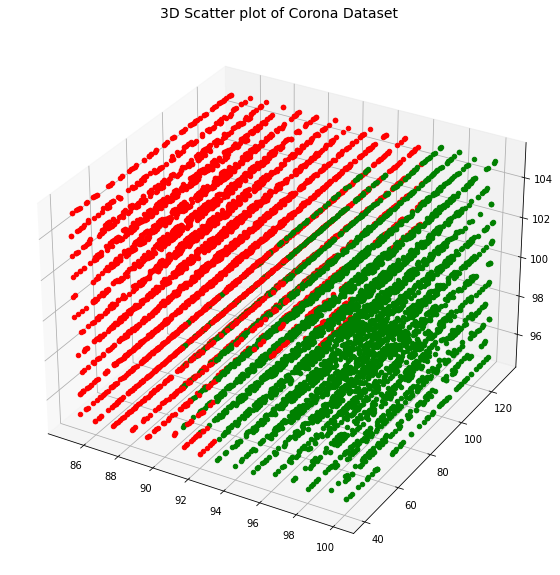

Red --> Corona Positive | Green --> Corona Negative


In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(10)

# syntax for 3-D projection
ax = plt.axes(projection ='3d')

# defining axes
x_axis = corona_df['Oxygen']
y_axis = corona_df['PulseRate']
z_axis = corona_df['Temperature']
c = x_axis + y_axis

for i in range(len(y)):
    if y[i] == 'Positive':
        ax.scatter(x_axis[i], y_axis[i], z_axis[i], color='red')
    else:
        ax.scatter(x_axis[i], y_axis[i], z_axis[i], color='green')

# syntax for plotting
ax.set_title('3D Scatter plot of Corona Dataset', fontsize=14)
plt.show()

print('Red --> Corona Positive | Green --> Corona Negative')

In [7]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
c_values = [1, 2, 5, 10]

best_accuracy = -1
best_kernal = ''
best_C = -1

for c in c_values:
    print('For C =', c)
    for k in kernels:
        model = svm.SVC(kernel=k, C=c)
        cv_score = cross_val_score(model,X,y,cv=10)
        print('For Kernel:', k)
        print(cv_score)
        print('Accuracy is:', cv_score.mean())
        if cv_score.mean() > best_accuracy:
            best_accuracy = cv_score.mean()
            best_kernal = k
            best_C = c
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

For C = 1
For Kernel: linear
[0.923 0.918 0.932 0.932 0.912 0.926 0.912 0.93  0.916 0.911]
Accuracy is: 0.9212
For Kernel: poly
[0.938 0.944 0.946 0.944 0.93  0.949 0.935 0.946 0.943 0.918]
Accuracy is: 0.9392999999999999
For Kernel: rbf
[0.94  0.945 0.953 0.948 0.934 0.951 0.936 0.945 0.949 0.925]
Accuracy is: 0.9426
For Kernel: sigmoid
[0.501 0.501 0.501 0.501 0.501 0.501 0.501 0.501 0.501 0.501]
Accuracy is: 0.5010000000000001
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
For C = 2
For Kernel: linear
[0.923 0.918 0.932 0.932 0.912 0.926 0.912 0.93  0.916 0.911]
Accuracy is: 0.9212
For Kernel: poly
[0.938 0.945 0.946 0.945 0.931 0.95  0.933 0.947 0.942 0.918]
Accuracy is: 0.9395
For Kernel: rbf
[0.942 0.943 0.955 0.949 0.932 0.95  0.939 0.945 0.946 0.927]
Accuracy is: 0.9427999999999999
For Kernel: sigmoid
[0.501 0.501 0.501 0.501 0.501 0.501 0.501 0.501 0.501 0.501]
Accuracy is: 0.5010000000000001
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
For C 

In [8]:
print('Best Accuracy:', best_accuracy)
print('For Kernel:', best_kernal, 'and C =', best_C)

Best Accuracy: 0.9436000000000002
For Kernel: rbf and C = 10
